# Classifying Consumer Financial Complaints

This is supervised multi-class text classification problem. Given a new complaints we need to assign it to one of 4 categories.


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_excel('CFPB_Sample_20170831.xlsx')


In [5]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-17,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,2016-10-20,Closed with explanation,Yes,No,2163100
1,2016-04-27,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,In XXXX of XXXX I bought a new car. The dealer...,NaN,"CITIZENS FINANCIAL GROUP, INC.",IN,460XX,NaN,Consent provided,Web,2016-04-29,Closed with monetary relief,Yes,No,1898052
2,2016-02-26,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,"I had several XXXX XX/XX/XXXX,XX/XX/XXXX and X...",NaN,TOYOTA MOTOR CREDIT CORPORATION,IL,604XX,NaN,Consent provided,Web,2016-03-02,Closed with explanation,Yes,Yes,1806140
3,2016-10-03,Consumer Loan,Installment loan,Managing the loan or lease,NaN,I have taken out a loan with Citizens One thro...,NaN,"CITIZENS FINANCIAL GROUP, INC.",NY,117XX,NaN,Consent provided,Web,2016-10-05,Closed with explanation,Yes,No,2140702
4,2016-08-08,Consumer Loan,Installment loan,Managing the loan or lease,NaN,I had a lien through Fifth Third bank on my ve...,NaN,FIFTH THIRD FINANCIAL CORPORATION,VA,231XX,NaN,Consent provided,Web,2016-08-08,Closed with explanation,Yes,No,2051339


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16197 entries, 0 to 16196
Data columns (total 18 columns):
Date received                   16197 non-null datetime64[ns]
Product                         16197 non-null object
Sub-product                     12100 non-null object
Issue                           16197 non-null object
Sub-issue                       4550 non-null object
Consumer_complaint_narrative    16195 non-null object
Company public response         8032 non-null object
Company                         16197 non-null object
State                           16185 non-null object
ZIP code                        16184 non-null object
Tags                            2647 non-null object
Consumer consent provided?      16197 non-null object
Submitted via                   16197 non-null object
Date sent to company            16197 non-null datetime64[ns]
Company response to consumer    16197 non-null object
Timely response?                16197 non-null object
Consumer dispu

In [7]:
df.shape

(16197, 18)

In [8]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [9]:
df_CFPB = df[['Product', 'Sub-product','Consumer_complaint_narrative']]

In [10]:
df_CFPB.head(5)

,Product,Sub-product,Consumer_complaint_narrative
0,Consumer Loan,Vehicle loan,I purchased a new car on XXXX XXXX. The car de...
1,Consumer Loan,Vehicle loan,In XXXX of XXXX I bought a new car. The dealer...
2,Consumer Loan,Vehicle loan,"I had several XXXX XX/XX/XXXX,XX/XX/XXXX and X..."
3,Consumer Loan,Installment loan,I have taken out a loan with Citizens One thro...
4,Consumer Loan,Installment loan,I had a lien through Fifth Third bank on my ve...


In [11]:
df_CFPB.tail(5)

,Product,Sub-product,Consumer_complaint_narrative
16192,Mortgage,Conventional fixed mortgage,My house has already gone through the process ...
16193,Mortgage,Conventional fixed mortgage,The homeowner has been trying to get a loan mo...
16194,Mortgage,Conventional fixed mortgage,My loan is currently serviced by Bank of Ameri...
16195,Mortgage,Conventional fixed mortgage,CITIMORTGAGE IS STEALING MY HOME It 's Gone XX...
16196,Mortgage,Conventional fixed mortgage,After speaking with CFPB supervisor XXXX XXXX ...


In [12]:
#Class imbalance
df_CFPB['Product'].value_counts()

Mortgage            7024
Consumer Loan       4623
Credit reporting    4097
Debt collection      453
Name: Product, dtype: int64

In [13]:
df_CFPB['Product_id'] = df_CFPB['Product'].factorize()[0]

C:\Users\rajam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_CFPB.tail()

,Product,Sub-product,Consumer_complaint_narrative,Product_id
16192,Mortgage,Conventional fixed mortgage,My house has already gone through the process ...,3
16193,Mortgage,Conventional fixed mortgage,The homeowner has been trying to get a loan mo...,3
16194,Mortgage,Conventional fixed mortgage,My loan is currently serviced by Bank of Ameri...,3
16195,Mortgage,Conventional fixed mortgage,CITIMORTGAGE IS STEALING MY HOME It 's Gone XX...,3
16196,Mortgage,Conventional fixed mortgage,After speaking with CFPB supervisor XXXX XXXX ...,3


In [16]:
df_CFPB = df_CFPB[pd.notnull(df_CFPB['Consumer_complaint_narrative'])]

In [17]:
df_CFPB_Id = df_CFPB[['Product','Consumer_complaint_narrative','Product_id']]
#df_CFPB_Id['Consumer_complaint_narrative'] = df_CFPB[pd.notnull(df_CFPB['Consumer_complaint_narrative'])]


In [18]:
df_CFPB_Id.tail()

,Product,Consumer_complaint_narrative,Product_id
16192,Mortgage,My house has already gone through the process ...,3
16193,Mortgage,The homeowner has been trying to get a loan mo...,3
16194,Mortgage,My loan is currently serviced by Bank of Ameri...,3
16195,Mortgage,CITIMORTGAGE IS STEALING MY HOME It 's Gone XX...,3
16196,Mortgage,After speaking with CFPB supervisor XXXX XXXX ...,3


### Data Visualization

#### Number of complaints per product

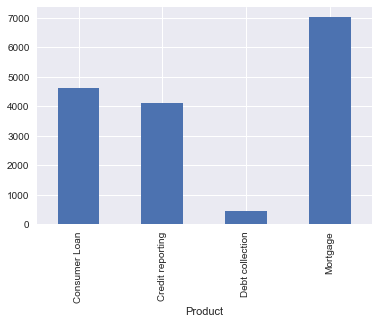

In [19]:
df_CFPB_Id.groupby('Product').Consumer_complaint_narrative.count().plot.bar()

## Text Classification

##### Train/Test Split

In [20]:
X = df_CFPB_Id['Consumer_complaint_narrative']
y = df_CFPB_Id['Product_id']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

#### Vectorization

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorized = vectorizer.fit_transform(X_train).toarray()

In [23]:
vectorized.shape

(11336, 21684)

## Create a Model

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
mnb = MultinomialNB().fit(vectorized,y_train)

In [26]:
print(mnb.predict(vectorizer.transform(["My house has already gone through the process of foreclosure.\
                                        I was notified by my insurance \
                                        company that XXXX requested to be added to my insurance account just a few "])))

[3]


In [27]:
print(mnb.predict(vectorizer.transform(["I have been issuing credit disputes regarding medical bills\
                                        and car loans that were my ex husbands, and as soon as they \
                                        take it off the report it is put back on causing my credit "])))


[1]


## Model Selection

In [46]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [47]:
models = []
models.append(('SVM',LinearSVC()))
models.append(('Mnb',MultinomialNB()))
models.append(('Tree',DecisionTreeClassifier()))

#models = [MultinomialNB(), SVC(), RandomForestClassifier(n_estimators=100,max_depth=3,random_state=101)]

Scores = []
for name, model in models:
    model_name = name
    print(model_name)
    accuracies = cross_val_score(model,vectorized,y_train,scoring='accuracy',cv=5)
    
    for fold,accuracy in enumerate(accuracies):
        Scores.append((model_name,fold,accuracy))
        cv_df = pd.DataFrame(Scores, columns=['Model_name','fold','accuracy'])


SVM
Mnb
Tree


In [48]:
cv_df.groupby('Model_name').accuracy.mean()

Model_name
Mnb     0.893349
SVM     0.955189
Tree    0.889555
Name: accuracy, dtype: float64